In [54]:
import pandas as pd
from keras.optimizers import Adam

In [55]:
data=pd.read_csv("mnist_train.csv")
X_train=data.drop('label', axis=1)
y_train=data['label']
adam = Adam(lr = 0.0001)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [56]:
data1=pd.read_csv("mnist_train.csv")
X_train=data.drop('label', axis=1)
y_train=data['label']

In [57]:
X = data.drop('label', axis = 1)
y = data['label']

In [58]:
import matplotlib.pyplot as plt

In [59]:
X.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


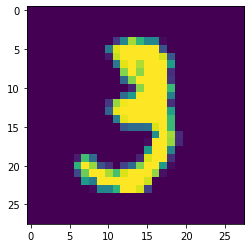

In [60]:
plt.imshow(X.iloc[10].values.reshape(28, 28))

In [61]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D

In [62]:
X.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
N = X.shape[0]
X_new = X.values.reshape(N, 28, 28, 1)

In [64]:
X_new.shape

(60000, 28, 28, 1)

In [65]:
X.shape
## (N, D) ---> (N, Xpixels, Ypixels, number of channels)

(60000, 784)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

In [67]:
model = Sequential()
model.add(Conv2D( 36, 1, activation = 'relu', input_shape = (28, 28, 1) ))
model.add(MaxPool2D(2))
model.add(Conv2D(16, 3, activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(36, 3, activation = 'relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.build()

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 36)        72        
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 36)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 16)        5200      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 36)          5220      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 2, 2, 36)        

In [69]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [70]:
history = model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=10,batch_size=16)

Epoch 1/10
3000/3000 [==============================] - 54s 18ms/step - loss: 0.2575 - accuracy: 0.9228 - val_loss: 0.1001 - val_accuracy: 0.9670
Epoch 2/10
3000/3000 [==============================] - 55s 18ms/step - loss: 0.1006 - accuracy: 0.9685 - val_loss: 0.0811 - val_accuracy: 0.9730
Epoch 3/10
3000/3000 [==============================] - 51s 17ms/step - loss: 0.0796 - accuracy: 0.9748 - val_loss: 0.0728 - val_accuracy: 0.9771
Epoch 4/10
3000/3000 [==============================] - 52s 17ms/step - loss: 0.0647 - accuracy: 0.9792 - val_loss: 0.0704 - val_accuracy: 0.9762
Epoch 5/10
3000/3000 [==============================] - 51s 17ms/step - loss: 0.0555 - accuracy: 0.9817 - val_loss: 0.0735 - val_accuracy: 0.9783
Epoch 6/10
3000/3000 [==============================] - 51s 17ms/step - loss: 0.0484 - accuracy: 0.9839 - val_loss: 0.0660 - val_accuracy: 0.9812
Epoch 7/10
3000/3000 [==============================] - 51s 17ms/step - loss: 0.0406 - accuracy: 0.9867 - val_loss: 0.0633 -

In [71]:
test_loss, test_acc=model.evaluate(X_test, y_test)
print('Model 3 Test Accuracy: ', test_acc)

375/375 [==============================] - 3s 7ms/step - loss: 0.0688 - accuracy: 0.9812
Model 3 Test Accuracy:  0.981249988079071
